In [29]:
import cv2 as cv
import imutils
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\giova\AppData\Local\Tesseract-OCR\tesseract.exe'

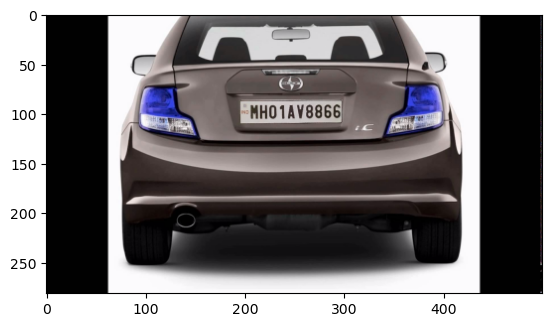

In [157]:
image = cv.imread('8.jpg')
image = imutils.resize(image, width=500)
plt.imshow(image, 'gray', vmin=0, vmax=255)

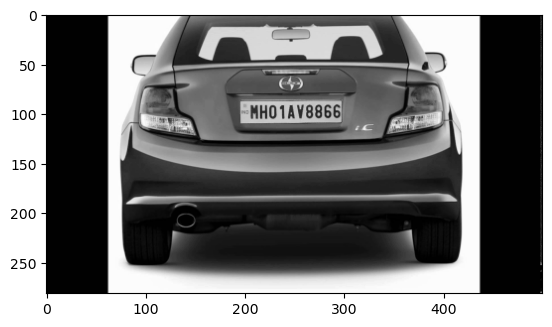

In [158]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray, 'gray', vmin=0, vmax=255)

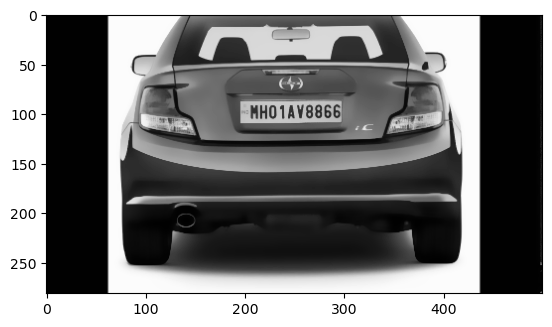

In [159]:
# noise removal with iterative bilateral filter (remioves noise while preserving edges)
gray = cv.bilateralFilter(gray, 11, 17, 17)
plt.imshow(gray, 'gray', vmin=0, vmax=255)


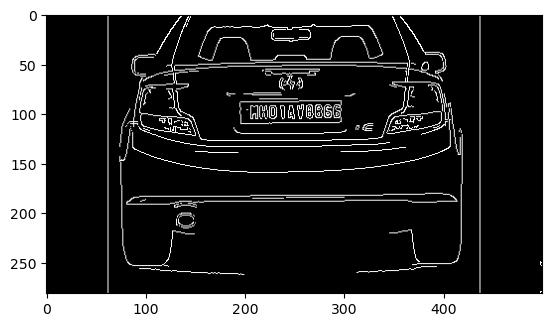

In [160]:
# find edges on the grayscale image
edged = cv.Canny(gray, 170, 200)
plt.imshow(edged, 'gray', vmin=0, vmax=255)

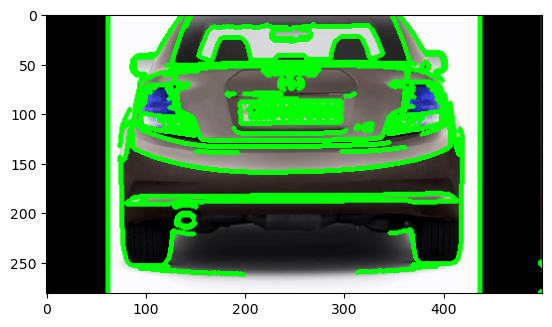

In [161]:
# finf the countours based on edges
cnts, new = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# create a copy of the original image to draw all contours
img1 = image.copy()
cv.drawContours(img1, cnts, -1, (0, 255, 0), 3)
plt.imshow(img1, 'gray', vmin=0, vmax=255)

In [162]:
cnts=sorted(cnts, key=cv.contourArea, reverse=True)[:30]
NumberPlateCnt = None

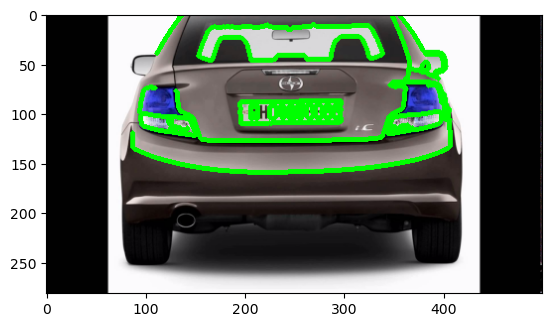

In [163]:
# top 30 contours
img2 = image.copy()
cv.drawContours(img2, cnts, -1, (0, 255, 0), 3)
plt.imshow(img2, 'gray', vmin=0, vmax=255)

In [164]:
# loop over our contours to find the best possible contou of number plate
count = 0
idx = 7
for c in cnts:
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.02*peri, True)
    if len(approx) == 4: # Select the contour with 4 corners
        NumberPlateCnt = approx # This is our approx Number Plate Contour
        
        # Crop those contours and store it in Cropped Images foldes
        x, y, w, h = cv.boundingRect(c) # This will find out co-ord for plate
        new_img = image[y:y + h, x:x + w] # Create new image
        cv.imwrite(str(idx)+'.png', new_img) # Store new image
        idx+=1
        break

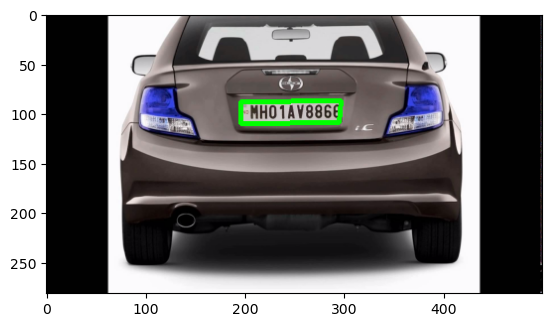

In [165]:
# drawing the selected contour on the original image
cv.drawContours(image, [NumberPlateCnt], -1, (0, 255, 0), 3)
plt.imshow(image, 'gray', vmin=0, vmax=255)

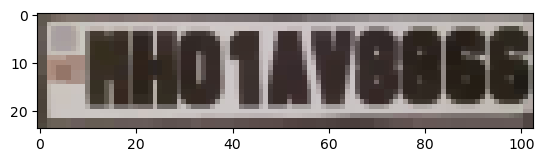

In [166]:
cropped_img_loc = cv.imread('7.png')
kernel = np.ones((3, 3), np.uint8)
cropped_img_loc = cv.erode(cropped_img_loc, kernel, iterations=1)
plt.imshow(cropped_img_loc, 'gray', vmin=0, vmax=255)

In [169]:
# use the tesseract to convert image into string
# myconfig = r"--psm 11 --oem 0"
myconfig = r'-l eng --psm 6'

text = pytesseract.image_to_string(cropped_img_loc, config=myconfig, lang='eng+equ')
print('Number is:', text)

Number is: | AHO 1AVG866

